In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

In the video we have discussed that for MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [2]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
x

array([14, 50, 13, 78, 15])

1) Compute *normalized* weights:

In [6]:
inv_x = 1.0/x
inv_x

array([ 0.07142857,  0.02      ,  0.07692308,  0.01282051,  0.06666667])

In [7]:
w = inv_x/sum(inv_x)
w

array([ 0.28820573,  0.08069761,  0.31037541,  0.05172923,  0.26899202])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [8]:
idxs = np.argsort(w)
sorted_w = w[idxs]
sorted_w

array([ 0.05172923,  0.08069761,  0.26899202,  0.28820573,  0.31037541])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

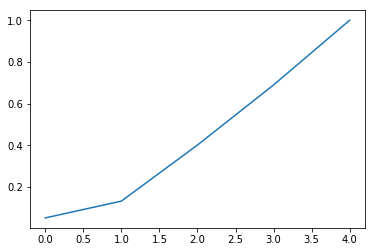

sorted_w_cumsum:  [ 0.05172923  0.13242684  0.40141886  0.68962459  1.        ]


In [9]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [10]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

3

5) Finally, your answer is sample at that position:

In [11]:
pos = idxs[idx]
x[pos]

14

In [12]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [14 50 13 78 15]
Sorted data:  [13 14 15 50 78]
Weighted median: 14, Median: 15


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 